In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

import json

In [2]:
deals_df = pd.read_excel('./Контракты.xlsx') # датафрейм с контрактами
deals_df.head()

,Номер контракта,Дата публикации КС на ПП,Дата заключения контракта,Цена контракта,ИНН заказчика,КПП заказчика,Наименование заказчика,ИНН поставщика,КПП поставщика,Наименование поставщика,СТЕ
0,10/2019-СГЗ,2019-06-13 17:07:08.753,2019-06-18,21970.00,7709043455,770901001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ДОПОЛНИТЕ...,5009062762,500901001.0,"ООО ""ОФИСМАГ""","[{""Id"":1226040,""Quantity"":100.00000,""Amount"":2..."
1,642-МЗ-44/19,2019-06-13 10:46:31.197,2019-06-18,85312.00,7719047184,771901001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,7725696613,772501001.0,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""МОСНАБ""","[{""Id"":null,""Quantity"":4.00000,""Amount"":42656...."
2,74-19,2019-06-13 15:34:06.630,2019-06-18,26638.34,7727597777,772701001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,7724456672,772401001.0,"ООО ""Жизнь офиса""","[{""Id"":null,""Quantity"":1.00000,""Amount"":26638...."
3,И-1200/19,2019-06-11 15:07:29.147,2019-06-18,82386.00,7714338609,771401001,ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ГОРОДА МОС...,503224250310,NaN,Индивидуальный предприниматель Кручинина Екате...,"[{""Id"":1405814,""Quantity"":120.00000,""Amount"":8..."
4,639-МЗ-44/19,2019-06-13 10:55:03.087,2019-06-18,28362.00,7719047184,771901001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,7706771569,772701001.0,"ООО ""ПРИНСИПАЛ-БМ""","[{""Id"":null,""Quantity"":300.00000,""Amount"":2836..."


In [3]:
products_df = pd.read_excel('./СТЕ.xlsx') # датафрейм с товарами
products_df.head()

,ID СТЕ,Название СТЕ,Категория,Код КПГЗ,Характеристики
0,1153097,мяч футбольный MIKASA REGATEADOR5-G,Мячи футбольные,01.08.01.13.01,"[{""Name"":""Модель"",""Id"":283795036,""Value"":""REGA..."
1,1153130,мяч волейбольный Gala Pro-Line 10 FIVB,Мячи волейбольные,01.08.01.14.03.01,"[{""Name"":""Марка"",""Id"":284249992,""Value"":""Gala""..."
2,1153163,мяч волейбольный Mikasa MVA380K-OBL,Мячи волейбольные,01.08.01.14.03.01,"[{""Name"":""Марка"",""Id"":284249802,""Value"":""MIKAS..."
3,1153174,мяч волейбольный Wilson Super Soft Play,Мячи волейбольные,01.08.01.14.03.01,"[{""Name"":""Марка"",""Id"":284246959,""Value"":""WILSO..."
4,1159300,Gutrend комплект расходных материалов для FUN ...,"Расходные материалы, комплектующие для прочего...",01.20.10.99,"[{""Name"":""Тип"",""Id"":284280400,""Value"":""Расходн..."


In [5]:
pd.options.display.max_colwidth = 100
reindex_cte = products_df.set_index("ID СТЕ")

def ex_json(js):
    js = json.loads(js)
    new = []
    for j in js:
        if j["Id"] is not None:
            new.append(reindex_cte.at[j["Id"],'Категория'])
            #new.append(str(j["Id"]))

    if len(new)>1:
        return new
    elif len(new)==1:
        return new
    else:
        return None

deals_df['cat'] = deals_df['СТЕ'].apply(ex_json)

deals_df = deals_df[~deals_df['cat'].isnull()]
#deals_df.sample(10)

deals_2 = deals_df.explode("cat")
deals_2.head(20)

,Номер контракта,Дата публикации КС на ПП,Дата заключения контракта,Цена контракта,ИНН заказчика,КПП заказчика,Наименование заказчика,ИНН поставщика,КПП поставщика,Наименование поставщика,СТЕ,cat
0,10/2019-СГЗ,2019-06-13 17:07:08.753,2019-06-18,21970.00,7709043455,770901001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ДОПОЛНИТЕЛЬНОГО ОБРАЗОВАНИЯ ГОРОДА МОСКВЫ «ДЕТСКАЯ МУЗЫКАЛЬ...,5009062762,500901001.0,"ООО ""ОФИСМАГ""","[{""Id"":1226040,""Quantity"":100.00000,""Amount"":21970.00000}]",Бумага для офисной техники белая
3,И-1200/19,2019-06-11 15:07:29.147,2019-06-18,82386.00,7714338609,771401001,ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ГОРОДА МОСКВЫ «АГЕНТСТВО ПО ЗАКУПКАМ (КОНТРАКТНАЯ СЛУЖБА) ДЕ...,503224250310,NaN,Индивидуальный предприниматель Кручинина Екатерина Анатольевна,"[{""Id"":1405814,""Quantity"":120.00000,""Amount"":82386.00000}]",Инфузионные системы
6,46-2019,2019-06-13 12:42:50.313,2019-06-18,4046.90,7702078650,770201001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ ГОРОДА МОСКВЫ «МУЗЕЙ «САДОВОЕ КОЛЬЦО»,772023045527,NaN,ИП Стадальникас Дмитрий Валерьевич,"[{""Id"":1430277,""Quantity"":2.00000,""Amount"":4046.90000}]",Сейфы прочие
9,103/06-2019,2019-06-06 11:19:48.130,2019-06-18,47151.48,7733126624,773301001,Государственное бюджетное общеобразовательное учреждение города Москвы «Школа № 1571»,7707769273,773301001.0,"ООО ""ТЕХАЛЬЯНС""","[{""Id"":1419553,""Quantity"":1.00000,""Amount"":47151.48000}]",Текущий ремонт зданий и сооружений культуры и образования
17,19-2630333,2019-06-13 13:08:49.553,2019-06-18,29353.00,7724750113,772401001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ГОРОДА МОСКВЫ «ГОРОДСКАЯ ПОЛИКЛИНИКА № 52 Д...,5009062762,500901001.0,"ООО ""ОФИСМАГ""","[{""Id"":1431078,""Quantity"":20.00000,""Amount"":29353.00000}]",Вентиляторы бытовые
20,1601ма-19-51,2019-06-05 15:46:04.910,2019-06-18,395999.00,7714283124,771401001,Государственное бюджетное общеобразовательное учреждение города Москвы «Школа № 1601 имени Героя...,774319020570,NaN,ИП Савин Иван Борисович,"[{""Id"":1362397,""Quantity"":1.00000,""Amount"":395999.00000}]",Обслуживание техническое и текущий ремонт нежилых помещений и зданий
21,79-19Б,2019-06-13 10:58:37.080,2019-06-18,50357.60,7705031674,770301001,Департамент городского имущества города Москвы,5009062762,500901001.0,"ООО ""ОФИСМАГ""","[{""Id"":1205430,""Quantity"":40.00000,""Amount"":50357.60000}]",Конверты почтовые
24,44,2019-06-11 11:03:40.440,2019-06-18,7521.55,7714045360,771401001,"ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МОСКВЫ ""СПОРТИВНАЯ ШКОЛА ОЛИМПИЙСКОГО РЕЗЕРВА № 25"" ...",7727844377,772701001.0,Общество с ограниченной ответственностью «ГУД ОЧОЙС»,"[{""Id"":null,""Quantity"":288.00000,""Amount"":3237.12000},{""Id"":1229090,""Quantity"":12.00000,""Amount""...",Порошки чистящие
24,44,2019-06-11 11:03:40.440,2019-06-18,7521.55,7714045360,771401001,"ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МОСКВЫ ""СПОРТИВНАЯ ШКОЛА ОЛИМПИЙСКОГО РЕЗЕРВА № 25"" ...",7727844377,772701001.0,Общество с ограниченной ответственностью «ГУД ОЧОЙС»,"[{""Id"":null,""Quantity"":288.00000,""Amount"":3237.12000},{""Id"":1229090,""Quantity"":12.00000,""Amount""...",Средства моющие для туалетов и ванных комнат
24,44,2019-06-11 11:03:40.440,2019-06-18,7521.55,7714045360,771401001,"ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МОСКВЫ ""СПОРТИВНАЯ ШКОЛА ОЛИМПИЙСКОГО РЕЗЕРВА № 25"" ...",7727844377,772701001.0,Общество с ограниченной ответственностью «ГУД ОЧОЙС»,"[{""Id"":null,""Quantity"":288.00000,""Amount"":3237.12000},{""Id"":1229090,""Quantity"":12.00000,""Amount""...",Порошок стиральный


In [33]:
deals_2.sample(20)

,Номер контракта,Дата публикации КС на ПП,Дата заключения контракта,Цена контракта,ИНН заказчика,КПП заказчика,Наименование заказчика,ИНН поставщика,КПП поставщика,Наименование поставщика,СТЕ,cat
378685,23/12/19Н,2019-12-19 11:28:18.453,2019-12-24 00:00:00.000,259118.20,7726065787,772601001,государственное бюджетное учреждение города москвы «спортивная школа олимпийского резерва № 42» ...,7743877813,774301001.0,"ООО ""ИНФОРМ-МЕДИА""","[{""Id"":18869407,""Quantity"":11.00000,""Amount"":1711.60000},{""Id"":21217575,""Quantity"":5.00000,""Amou...","Средства защиты ног, кроме обуви специальной"
208002,ХОЗ/2019,2019-08-23 13:59:23.610,2019-08-29 00:00:00.000,211110.68,7734570529,773401001,государственное автономное учреждение дополнительного образования города москвы «детский музыкал...,7714422970,771401001.0,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""КАНЦОФИС""","[{""Id"":null,""Quantity"":100.00000,""Amount"":34460.00000},{""Id"":null,""Quantity"":60.00000,""Amount"":2...",Инвентарь уборочный пластмассовый
347660,17/20-кс,2020-11-26 17:50:11.627,2020-12-03 00:00:00.000,388396.24,7730038730,773001001,государственное бюджетное общеобразовательное учреждение города москвы «школа № 710 им. народног...,3120099011,312001001.0,"ООО ""ПСС""","[{""Id"":1394211,""Quantity"":50.00000,""Amount"":3640.00000},{""Id"":18557111,""Quantity"":50.00000,""Amou...",Фурнитура для сантехнического оборудования
326797,2098-2021-110,2021-04-19 09:20:08.000,2021-04-23 00:00:00.000,49470.00,7743905443,774301001,государственное бюджетное общеобразовательное учреждение города москвы «школа № 2098 «многопрофи...,9718081852,771801001.0,"Общество с ограниченной ответственностью ""РЕКЛАМНЫЕ РЕШЕНИЯ""","[{""Id"":34841301,""Quantity"":10.00000,""Amount"":49470.00000}]",Баннерные декорации
75504,12032021-1,2021-03-11 11:33:06.907,2021-03-12 14:55:25.093,2528.40,7735055979,773501001,государственное бюджетное учреждение города москвы «спортивная школа олимпийского резерва № 111»...,5044076246,504401001.0,"ООО ""МЕНДЕЛЕЕВО-АВТОТЕСТ""","[{""Id"":1299201,""Quantity"":2.00000,""Amount"":2528.40000}]",Техническое обслуживание и текущий ремонт пассажирского транспорта
80618,12/21,2021-03-12 14:45:18.977,2021-03-19 00:00:00.000,24891.25,7715135841,771501001,государственное бюджетное учреждение культуры города москвы «дом культуры «смена»,7715445032,771501001.0,"Общество с ограниченной ответственностью ""ГРУППА КОМПАНИЙ РОЗТОР""","[{""Id"":1195173,""Quantity"":75.00000,""Amount"":537.75000},{""Id"":1198261,""Quantity"":3.00000,""Amount""...",Карандаши чернографитные
307926,21-4714104,2021-09-03 09:03:08.713,2021-09-08 00:00:00.000,9720.00,7717043346,771701001,государственное автономное образовательное учреждение высшего образования города москвы «московс...,7718744440,771801001.0,"Общество с ограниченной ответственностью ""АКАДЕМИЯ-ГРУПП""","[{""Id"":24365118,""Quantity"":4.00000,""Amount"":9720.00000}]",Термометр электронный
202217,ПК-11/2019,2019-11-12 15:23:01.887,2019-11-15 00:00:00.000,226434.11,7728007156,772801001,государственное бюджетное общеобразовательное учреждение города москвы «центр спорта и образован...,7709251649,771301001.0,Общество с ограниченной ответственностью «АРГУС МАСТЕР»,"[{""Id"":1214557,""Quantity"":1.00000,""Amount"":3397.50000},{""Id"":1215937,""Quantity"":1.00000,""Amount""...",Расходные материалы и комплектующие для лазерных принтеров и МФУ
317780,81-07/2021,2021-07-01 09:09:07.607,2021-07-06 00:00:00.000,25754.40,7717694852,771701001,государственное бюджетное учреждение культуры города москвы «централизованная библиотечная систе...,7729778754,772901001.0,"Общество с ограниченной ответственностью ""ЛАРА КИДС""","[{""Id"":34984122,""Quantity"":6.00000,""Amount"":5762.40000},{""Id"":35037361,""Quantity"":3.00000,""Amoun...",Рамки для осветительного оборудования
209778,19-78,2019-09-30 09:00:00.000,2019-10-08 00:00:00.000,34445.00,7714199190,771401001,государственное бюджетное общеобразовательное учреждение города москвы «школа № 1550»,7730575540

In [ ]:
deals_df.isnull().sum().sum() # смотрим сколько всего "пустых" значений в сделках

In [ ]:
deals_df.info()

In [ ]:
products_df.isnull().sum().sum() # смотрим сколько всего "пустых" значений в продуктах

In [ ]:
products_df.info()

In [6]:
sort_custom_count = pd.DataFrame(deals_2.groupby(['ИНН заказчика']).count().sort_values('Номер контракта', ascending=[False]))
index_max_custom = sort_custom_count.index[0] # ИНН самого активного заказчика
max_shopp_list = pd.Series(deals_2.loc[deals_2['ИНН заказчика'] == index_max_custom].СТЕ)
max_shopp_list = list(max_shopp_list) # список покупок самого активного заказчика

max_shopp_list_id = []

for product in max_shopp_list:
    a = json.loads(product)
    max_shopp_list_id.append(a[0]['Id'])

# список всех id товаров, которые заказывал самый активный заказчик, без повторений
max_shopp_set_id_s = set(max_shopp_list_id) 

all_categories = [] # список всех категорий самого популярного заказчика

for id in max_shopp_set_id_s:
    all_categories.append(products_df.loc[products_df['ID СТЕ'] == id]['Категория'])

index_max_custom

9718062105

In [7]:
sortec_category = products_df.groupby(['Категория']).count().sort_values('ID СТЕ', ascending=[False])
max_categpry = sortec_category.index[0] # самая популярная категория

# все товары самой большой категории
most_bought_cat = products_df[products_df['Категория'] == max_categpry]

# список товаров самой популярной категории
list_max_category =  most_bought_cat['ID СТЕ'].tolist()
 

In [8]:
# самая популярная категория по закупке

max_cat = deals_2.groupby(['cat']).count().sort_values('Номер контракта')
max_cat = max_cat.iloc[-1].name

In [9]:
# создание огромного списка закупок (инн категория1...категорияххх дата)

# список уникальных категорий
unique = products_df['Категория'].unique().tolist()

purchase_df = pd.DataFrame()

copy_list_max_category = unique
copy_list_max_category.append('Дата')
copy_list_max_category.insert(0, 'ИНН заказчика')

for atr in copy_list_max_category:
    purchase_df[atr] = numpy.nan
    
purchase_df.head()

,ИНН заказчика,Мячи футбольные,Мячи волейбольные,"Расходные материалы, комплектующие для прочего бытового оборудования",Фильтр для пылесоса,Пылесос,Принадлежности для шитья и рукоделия металлические,Иглы для швейных машин,Оверлоки,Швейная машина,...,"Расходные материалы и принадлежности для оборудования ""zoll medical corporation""","Электроды к инструментам аппаратов электрохирургических высокочастотных ""arc""",Часы шахматные настольные,Сетки стальные плетеные (сетка рабица),Услуги по обращению с отходами биологическими (кроме медицинских),"Msh2 антиген ивд, антитела",Эспандеры,"Оказание услуг по организации научных, спортивных, деловых и представительских мероприятий за пределами рф","Пластина для фиксации для черепно-лицевой хирургии, рассасывающаяся",Дата


/Users/arina/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='month', ylabel='Цена контракта'>

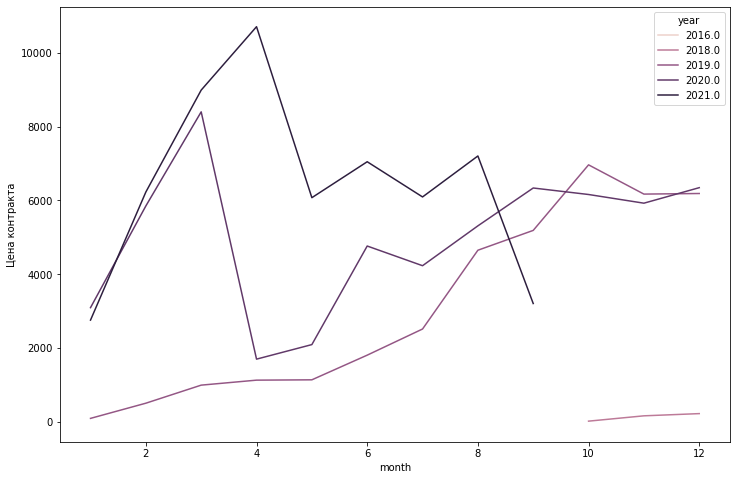

In [10]:
# выбрр данных с закупок - дата и цена ДО 50к!!!
date_cost_df_less = deals_df.loc[deals_df['Цена контракта'] <= 50000.00]
date_cost_df_less.drop(['Номер контракта', 'Дата публикации КС на ПП', 'ИНН заказчика', 'СТЕ'], axis=1, inplace=True)

# Сортируем по дате и выделяем год и месяц меньше 50к
date_cost_df_less = date_cost_df_less.sort_values(['Дата заключения контракта'])

date_cost_df_less['month'] = date_cost_df_less['Дата заключения контракта'].dt.month
date_cost_df_less['year'] = date_cost_df_less['Дата заключения контракта'].dt.year

# группировка по месяц/год меньше 50к
group_date_less = date_cost_df_less.groupby(['month', 'year']).sum(['Цена контракта'])


# группировка по месяц/год меньше 50к по сумме
group_date_less_c = date_cost_df_less.groupby(['month', 'year']).count().reset_index()

# построение графика меньше 50к по счетчику

plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='Цена контракта', data = group_date_less_c,hue="year")

<AxesSubplot:xlabel='month', ylabel='Цена контракта'>

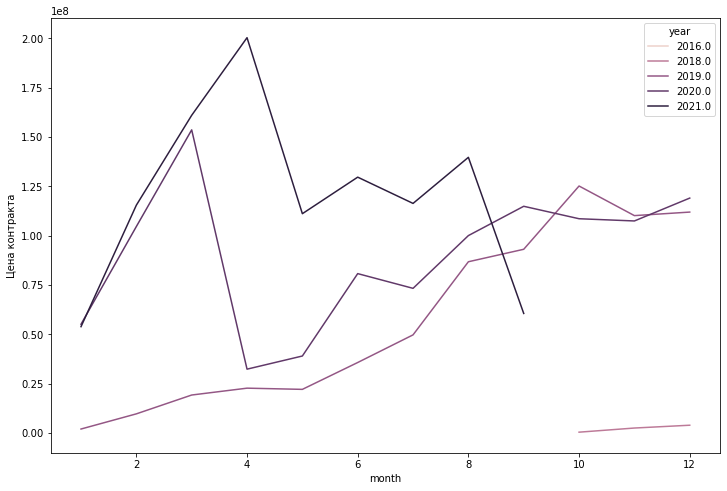

In [11]:
# построение графика меньше 50к по сумме

plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='Цена контракта', data = group_date_less,hue="year")

/Users/arina/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='month', ylabel='Цена контракта'>

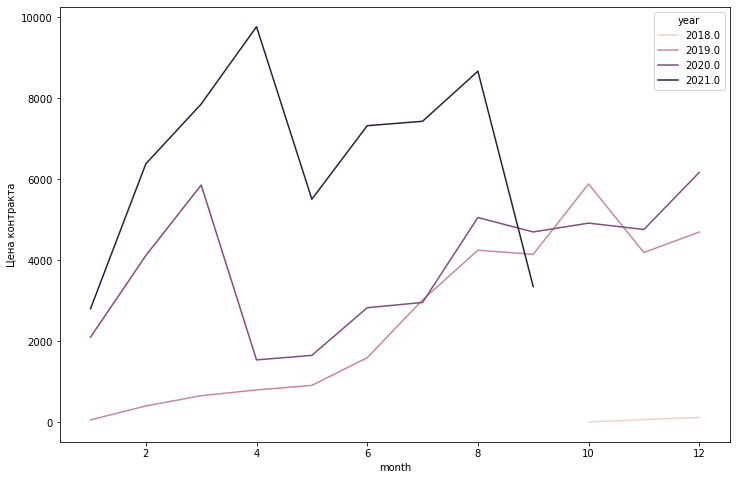

In [12]:
# выбрр данных с закупок - дата и цена ВЫШЕ 50к!!!

date_cost_df_more = deals_df.loc[deals_df['Цена контракта'] >= 50000.00]
date_cost_df_more.drop(['Номер контракта', 'Дата публикации КС на ПП', 'ИНН заказчика', 'СТЕ'], axis=1, inplace=True)

# Сортируем по дате и выделяем год и месяц где больше 50к
date_cost_df_more = date_cost_df_more.sort_values(['Дата заключения контракта'])

date_cost_df_more['month'] = date_cost_df_more['Дата заключения контракта'].dt.month
date_cost_df_more['year'] = date_cost_df_more['Дата заключения контракта'].dt.year

# группировка по месяц/год больше 50к по счетчику
group_date_more = date_cost_df_more.groupby(['month', 'year']).count().reset_index()

# группировка по месяц/год больше 50к по сумме
group_date_more_c = date_cost_df_more.groupby(['month', 'year']).sum(['Цена контракта'])

# построение графика больше 50к по счетчику
plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='Цена контракта', data = group_date_more ,hue="year")

<AxesSubplot:xlabel='month', ylabel='Цена контракта'>

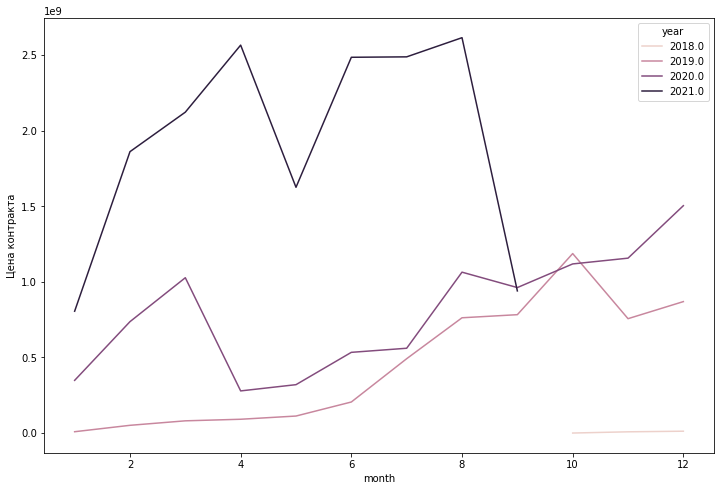

In [13]:
# построение графика больше 50к по сумме

plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='Цена контракта', data = group_date_more_c,hue="year")

In [49]:
a = deals_df.loc[deals_df['ИНН заказчика'] == index_max_custom]

pd.options.display.max_colwidth = 100
reindex_cte = products_df.set_index("ID СТЕ")

def ex_json(js):
    js = json.loads(js)
    new = []
    for j in js:
        if j["Id"] is not None:
            new.append(j["Id"])
            #new.append(str(j["Id"]))

    if len(new)>1:
        return new
    elif len(new)==1:
        return new
    else:
        return None

    
deals_df['cat'] = deals_df['СТЕ'].apply(ex_json)

deals_df = deals_df[~deals_df['cat'].isnull()]
#deals_df.sample(10)

deals_df_cat = deals_df.explode("cat")


In [50]:
deals_df_cat.head(20)

,Номер контракта,Дата публикации КС на ПП,Дата заключения контракта,Цена контракта,ИНН заказчика,КПП заказчика,Наименование заказчика,ИНН поставщика,КПП поставщика,Наименование поставщика,СТЕ,cat
0,10/2019-СГЗ,2019-06-13 17:07:08.753,2019-06-18,21970.00,7709043455,770901001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ДОПОЛНИТЕЛЬНОГО ОБРАЗОВАНИЯ ГОРОДА МОСКВЫ «ДЕТСКАЯ МУЗЫКАЛЬ...,5009062762,500901001.0,"ООО ""ОФИСМАГ""","[{""Id"":1226040,""Quantity"":100.00000,""Amount"":21970.00000}]",1226040
3,И-1200/19,2019-06-11 15:07:29.147,2019-06-18,82386.00,7714338609,771401001,ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ГОРОДА МОСКВЫ «АГЕНТСТВО ПО ЗАКУПКАМ (КОНТРАКТНАЯ СЛУЖБА) ДЕ...,503224250310,NaN,Индивидуальный предприниматель Кручинина Екатерина Анатольевна,"[{""Id"":1405814,""Quantity"":120.00000,""Amount"":82386.00000}]",1405814
6,46-2019,2019-06-13 12:42:50.313,2019-06-18,4046.90,7702078650,770201001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ ГОРОДА МОСКВЫ «МУЗЕЙ «САДОВОЕ КОЛЬЦО»,772023045527,NaN,ИП Стадальникас Дмитрий Валерьевич,"[{""Id"":1430277,""Quantity"":2.00000,""Amount"":4046.90000}]",1430277
9,103/06-2019,2019-06-06 11:19:48.130,2019-06-18,47151.48,7733126624,773301001,Государственное бюджетное общеобразовательное учреждение города Москвы «Школа № 1571»,7707769273,773301001.0,"ООО ""ТЕХАЛЬЯНС""","[{""Id"":1419553,""Quantity"":1.00000,""Amount"":47151.48000}]",1419553
17,19-2630333,2019-06-13 13:08:49.553,2019-06-18,29353.00,7724750113,772401001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ГОРОДА МОСКВЫ «ГОРОДСКАЯ ПОЛИКЛИНИКА № 52 Д...,5009062762,500901001.0,"ООО ""ОФИСМАГ""","[{""Id"":1431078,""Quantity"":20.00000,""Amount"":29353.00000}]",1431078
20,1601ма-19-51,2019-06-05 15:46:04.910,2019-06-18,395999.00,7714283124,771401001,Государственное бюджетное общеобразовательное учреждение города Москвы «Школа № 1601 имени Героя...,774319020570,NaN,ИП Савин Иван Борисович,"[{""Id"":1362397,""Quantity"":1.00000,""Amount"":395999.00000}]",1362397
21,79-19Б,2019-06-13 10:58:37.080,2019-06-18,50357.60,7705031674,770301001,Департамент городского имущества города Москвы,5009062762,500901001.0,"ООО ""ОФИСМАГ""","[{""Id"":1205430,""Quantity"":40.00000,""Amount"":50357.60000}]",1205430
24,44,2019-06-11 11:03:40.440,2019-06-18,7521.55,7714045360,771401001,"ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МОСКВЫ ""СПОРТИВНАЯ ШКОЛА ОЛИМПИЙСКОГО РЕЗЕРВА № 25"" ...",7727844377,772701001.0,Общество с ограниченной ответственностью «ГУД ОЧОЙС»,"[{""Id"":null,""Quantity"":288.00000,""Amount"":3237.12000},{""Id"":1229090,""Quantity"":12.00000,""Amount""...",1229090
24,44,2019-06-11 11:03:40.440,2019-06-18,7521.55,7714045360,771401001,"ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МОСКВЫ ""СПОРТИВНАЯ ШКОЛА ОЛИМПИЙСКОГО РЕЗЕРВА № 25"" ...",7727844377,772701001.0,Общество с ограниченной ответственностью «ГУД ОЧОЙС»,"[{""Id"":null,""Quantity"":288.00000,""Amount"":3237.12000},{""Id"":1229090,""Quantity"":12.00000,""Amount""...",1238048
24,44,2019-06-11 11:03:40.440,2019-06-18,7521.55,7714045360,771401001,"ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МОСКВЫ ""СПОРТИВНАЯ ШКОЛА ОЛИМПИЙСКОГО РЕЗЕРВА № 25"" ...",7727844377,772701001.0,Общество с ограниченной ответственностью «ГУД ОЧОЙС»,"[{""Id"":null,""Quantity"":288.00000,""Amount"":3237.12000},{""Id"":1229090,""Quantity"":12.00000,""Amount""...",1238126


In [55]:
prev = pd.DataFrame({"id":[0],"Amount":[0]})
def amount_json(js):
    global prev
    js = json.loads(js)
    new = []
    for j in js:
        if j["Id"] is not None:
            
            prev.loc[prev.index.max()+1] = [j["Id"],j["Amount"]]
            #new.append(str(j["Id"]))

    if len(new)>1:
        return new
    elif len(new)==1:
        return new
    else:
        return None

    
deals_df['cat'] = deals_df['СТЕ'].apply(ex_json)

In [56]:
prev.head()

,id,Amount
0,0,0


In [17]:
# поиск самой популярной категории у самого популярного заказчика
# 9718062105
most_cat = deals_2[deals_2['ИНН заказчика'] == index_max_custom]
most_cat = most_cat.groupby(['cat']).count().sort_values('ИНН заказчика', ascending=[False])
most_cat = most_cat.iloc[0].name

most_cat

'Прокат арматурный'

,Номер контракта,Дата публикации КС на ПП,Дата заключения контракта,Цена контракта,ИНН заказчика,КПП заказчика,Наименование заказчика,ИНН поставщика,КПП поставщика,Наименование поставщика,СТЕ,cat,month,year
3706,МОС-474/2021/Ц-з,2021-03-10 11:36:06.207,2021-03-17 17:00:39.163,1630200.0,9718062105,771801001,"Акционерное общество ""Мосотделстрой № 1""",7707439691,770701001.0,"ООО ""АСТОРИЯ""","[{""Id"":34103133,""Quantity"":40.00000,""Amount"":1630200.00000}]",Прокат арматурный,3,2021
5145,МОС-1903/2021/Ц-з,2021-07-09 09:05:18.587,2021-07-14 10:53:45.977,1646100.0,9718062105,771801001,"Акционерное общество ""Мосотделстрой № 1""",7717582411,771701001.0,"ООО ""КОНТРАКТ КОМПЛЕКТ ХХI""","[{""Id"":34636400,""Quantity"":20.00000,""Amount"":1646100.00000}]",Прокат арматурный,7,2021
11009,МОС-1805/2021/Н-з,2021-06-28 10:34:03.627,2021-07-05 16:44:02.007,2870875.0,9718062105,771801001,"Акционерное общество ""Мосотделстрой № 1""",6670491468,667001001.0,"ООО ""СТРОЙПАРТНЁР""","[{""Id"":34789281,""Quantity"":35.00000,""Amount"":2870875.00000}]",Прокат арматурный,6,2021
11011,МОС-1804/2021/Н-з,2021-06-28 10:33:14.627,2021-07-05 16:44:01.380,2851800.0,9718062105,771801001,"Акционерное общество ""Мосотделстрой № 1""",6670491468,667001001.0,"ООО ""СТРОЙПАРТНЁР""","[{""Id"":34673293,""Quantity"":22.00000,""Amount"":1792560.00000},{""Id"":34673308,""Quantity"":13.00000,""...",Прокат арматурный,6,2021
11011,МОС-1804/2021/Н-з,2021-06-28 10:33:14.627,2021-07-05 16:44:01.380,2851800.0,9718062105,771801001,"Акционерное общество ""Мосотделстрой № 1""",6670491468,667001001.0,"ООО ""СТРОЙПАРТНЁР""","[{""Id"":34673293,""Quantity"":22.00000,""Amount"":1792560.00000},{""Id"":34673308,""Quantity"":13.00000,""...",Прокат арматурный,6,2021


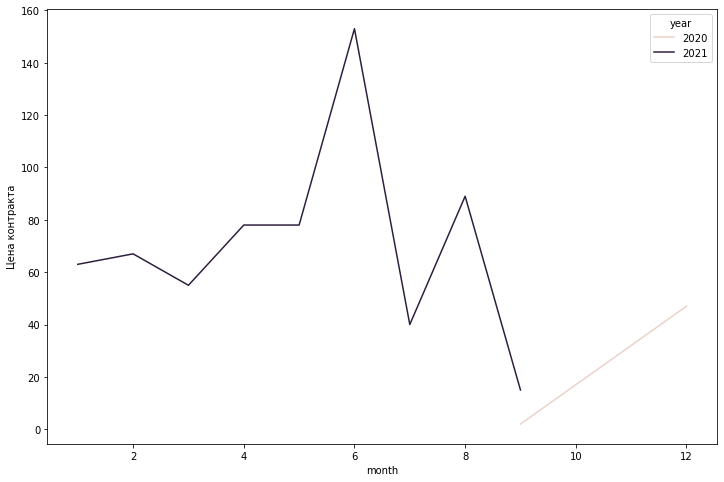

In [18]:
deals_9718062105 = deals_2[deals_2['ИНН заказчика'] == index_max_custom]
deals_9718062105 = deals_9718062105[deals_9718062105['cat'] == most_cat]
                           
#deals_9718062105.reset_index(inplace=True)
deals_9718062105['month'] = deals_9718062105['Дата публикации КС на ПП'].dt.month
deals_9718062105['year'] = deals_9718062105['Дата публикации КС на ПП'].dt.year


deals_df_cat_group = deals_9718062105.groupby(['month','year']).count()

plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='Цена контракта', data = deals_df_cat_group ,hue="year")

deals_9718062105.head()

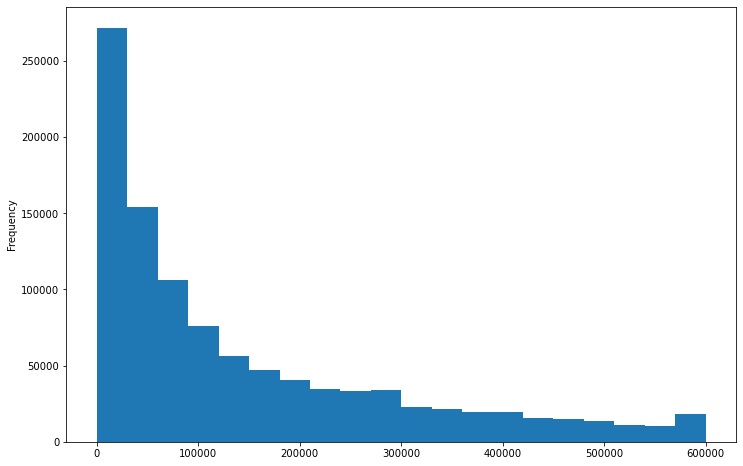

In [25]:
# гистограмма цена

all_hist = deals_2[deals_2['Цена контракта'] <= 600000]

plt.figure(figsize=(12, 8))
all_hist['Цена контракта'].plot(kind='hist', sharex=False, use_index=False, bins=20)
plt.show()

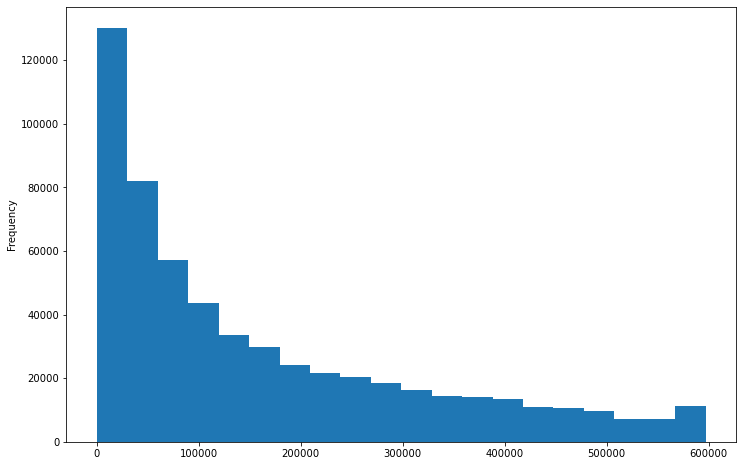

In [43]:
deals_2['Наименование заказчика'] = deals_2['Наименование заказчика'].str.lower()


def search_name(string):
    hist = deals_2[deals_2['Наименование заказчика'].str.contains(string)]
    hist = hist[hist['Цена контракта'] <= 600000]
    
    plt.figure(figsize=(12, 8))
    hist['Цена контракта'].plot(kind='hist', sharex=False, use_index=False, bins=20)
    
search_name('образов')
plt.show()

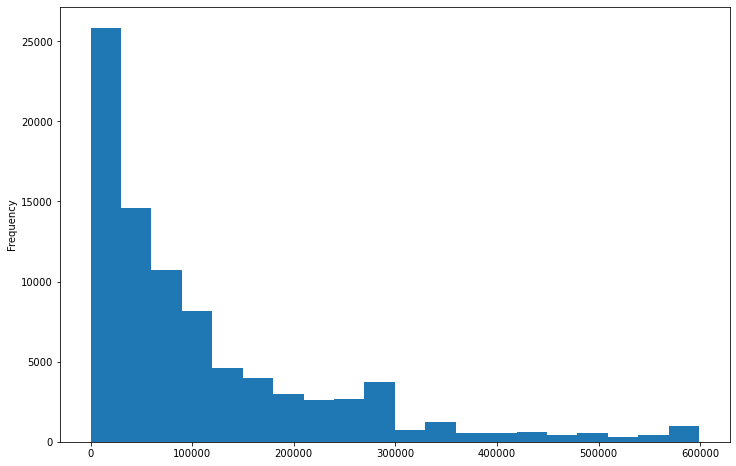

In [44]:
search_name('здраво')
plt.show()

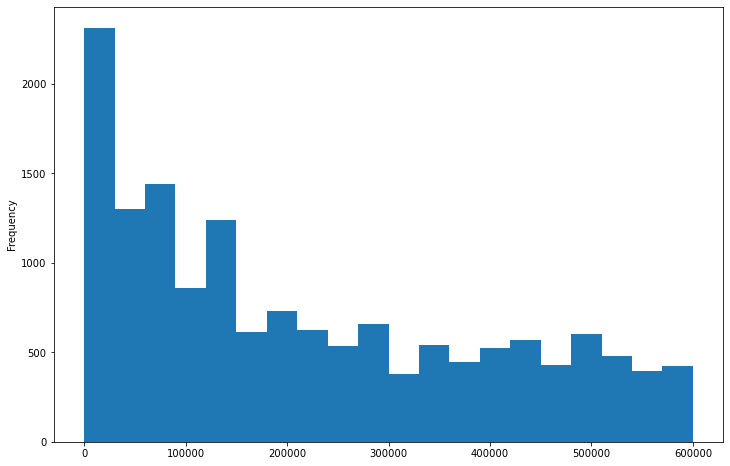

In [46]:
search_name('акцион')
plt.show()

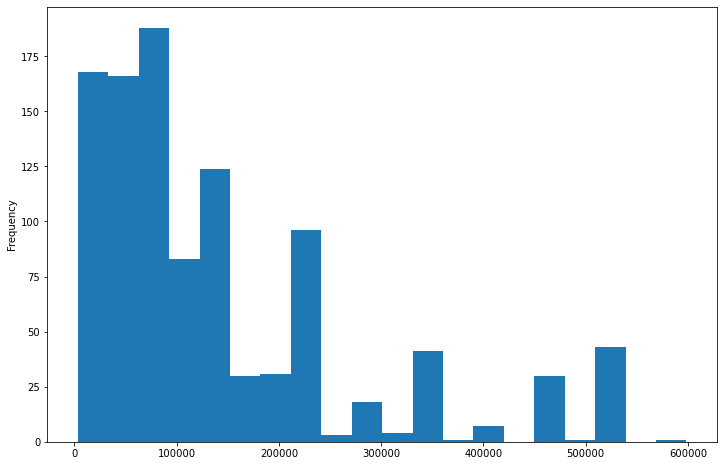

In [45]:
search_name('ооо')
plt.show()

In [ ]:
# поиск самой дорогой категории

